In [1]:
import rasterio
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import cartopy.crs as ccrs
mpl.rcParams['font.size'] = 14
mpl.rcParams['font.family'] = 'sans-serif'   # or 'serif', 'monospace', etc.

In [2]:
path1 = "Data/WaPOR-MOD16-PMLv2.tif"
path2 = "Data/WaPOR-SSEBop-PMLv2.tif"

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..38.15499087374276].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..53035.81621712941].


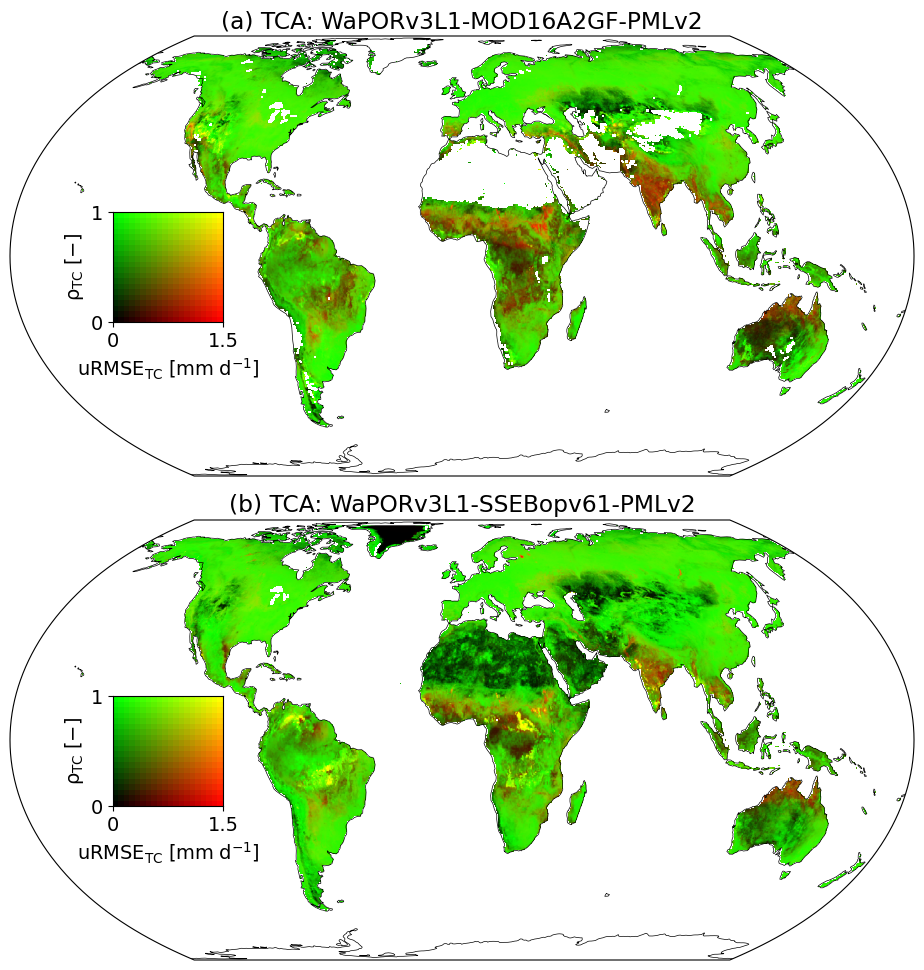

In [10]:

# Load first GeoTIFF
with rasterio.open(path1) as src:
    band1_1 = src.read(1)
    band1_2 = src.read(2)
    transform1 = src.transform
    extent1 = [src.bounds.left, src.bounds.right, src.bounds.bottom, src.bounds.top]

# Load second GeoTIFF
with rasterio.open(path2) as src:
    band2_1 = src.read(1)
    band2_2 = src.read(2)
    transform2 = src.transform
    extent2 = [src.bounds.left, src.bounds.right, src.bounds.bottom, src.bounds.top]


# Normalize values to 0–1 (modify as needed based on data ranges)
def normalizeSigma(arr):
    arr = np.where(np.isfinite(arr), arr, np.nan)
    return (arr -  0) / (1.5 - 0)

def normalizeRho(arr):
    arr = np.where(np.isfinite(arr), arr, np.nan)
    return (arr - 0) / (1 - 0)


b1_1_norm = normalizeSigma(band1_1)
b1_2_norm = normalizeRho(band1_2)

b2_1_norm = normalizeSigma(band2_1)
b2_2_norm = normalizeRho(band2_2)


# Create bivariate colormap for first file
rgb1 = np.zeros((b1_1_norm.shape[0], b1_1_norm.shape[1], 3))
rgb1[..., 0] = b1_1_norm  # red channel from band1_1
rgb1[..., 1] = b1_2_norm  # green channel from band1_2

# Create bivariate colormap for second file
rgb2 = np.zeros((b2_1_norm.shape[0], b2_1_norm.shape[1], 3))
rgb2[..., 0] = b2_1_norm  # red channel from band2_1
rgb2[..., 1] = b2_2_norm  # green channel from band2_2


# Create figure with two subplots (two rows, one column)
fig, axes = plt.subplots(2, 1, figsize=(18, 12), subplot_kw={'projection': ccrs.EqualEarth()})

# Plot bivariate for first file in the first subplot
ax1 = axes[0]
ax1.set_global()
ax1.imshow(rgb1, origin="upper", extent=extent1, transform=ccrs.PlateCarree())
ax1.coastlines(color="black", linewidth=0.5)
ax1.set_title("(a) TCA: WaPORv3L1-MOD16A2GF-PMLv2")

# Add legend for the first plot (optional, modify position as needed)
n = 20
x = np.linspace(0, 1, n)
y = np.linspace(0, 1, n)
legend = np.zeros((n, n, 3))
for i in range(n):
    for j in range(n):
        legend[i, j, 0] = x[j]   # red (band1)
        legend[i, j, 1] = y[i]   # green (band2)

axins1 = ax1.inset_axes([0.05, 0.35, 0.25, 0.25]) # [left, bottom, width, height] normalized to axes
axins1.imshow(legend, origin="lower", extent=[0, 1, 0, 1])
axins1.set_xlabel(r"$\mathrm{uRMSE_{TC}\;[mm\;d^{-1}]}$", fontsize=14)
axins1.set_ylabel(r"$\mathrm{\rho_{TC}\;[-]}$", fontsize=14)
axins1.set_xticks([0, 1])
axins1.set_xticklabels([0, 1.5])
axins1.set_yticks([0, 1])



# Plot bivariate for second file in the second subplot
ax2 = axes[1]
ax2.set_global()
ax2.imshow(rgb2, origin="upper", extent=extent2, transform=ccrs.PlateCarree())
ax2.coastlines(color="black", linewidth=0.5)
ax2.set_title("(b) TCA: WaPORv3L1-SSEBopv61-PMLv2")

# Add legend for the second plot (optional, modify position as needed)
axins2 = ax2.inset_axes([0.05, 0.35, 0.25, 0.25]) # [left, bottom, width, height] normalized to axes
axins2.imshow(legend, origin="lower", extent=[0, 1, 0, 1])
axins2.set_xlabel(r"$\mathrm{uRMSE_{TC}\;[mm\;d^{-1}]}$", fontsize=14)
axins2.set_ylabel(r"$\mathrm{\rho_{TC}\;[-]}$", fontsize=14)
axins2.set_xticks([0, 1])
axins2.set_xticklabels([0, 1.5])
axins2.set_yticks([0, 1])


fig.subplots_adjust(hspace=0.1) # Reduce vertical space between subplots
plt.savefig("Figure/5-8_bivariate_rho_sigma.png", dpi=300, bbox_inches="tight")
plt.show()